In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import requests
import json

%matplotlib inline

plt.style.use('ggplot')

pd.set_option('display.max_columns', 50)

In [ ]:
# # Visualize the images and their annotations
# image_identifiers = list(image_paths.keys())
# random.shuffle(image_identifiers) 
# for image_id in image_identifiers:
#     image_path = image_paths[image_id]
#     image = plt.imread(image_path)
#     bbox = image_bboxes[image_id]
#     parts = image_parts[image_id]
#     class_label = image_class_labels[image_id]
#     class_name = class_names[class_label]
      
#     # Render the image
#     plt.close(1)
#     fig = plt.figure(1, figsize=(16, 12))
#     plt.imshow(image)
#     plt.title("Image ID: %s \n Class Label: %s  [ID: %s]" % (image_id, class_name, class_label))
      
#     # Render the bounding box annotations
#     bbox_x, bbox_y, bbox_width, bbox_height = bbox
#     currentAxis = plt.gca()
#     currentAxis.add_patch(plt.Rectangle((bbox_x , bbox_y), bbox_width, bbox_height, facecolor="green", alpha=0.3))
      
#     # Render the part annotations
#     if has_networkx:
#     # Use networkx spring layout
        
#         G = nx.Graph()
#         part_data = []
#         initial_positions = {}
#         for part_id, part in enumerate(parts):
#             x, y, v = part
#             if v:
#                 part_str = 'part_%d' % (part_id,)
#                 label_str = 'label_%d' % (part_id,)
            
#                 G.add_node(part_str)
#                 G.add_node(label_str)
#                 G.add_edge(part_str, label_str)
            
#                 part_data.append(part_str)
            
#                 initial_positions[part_str] = (x, y)
#                 initial_positions[label_str] = (x, y)
            
#             positions = nx.spring_layout(G, dim=2, k=20.0, pos=initial_positions, fixed=part_data)
        
#             for part_id, part in enumerate(parts):
#                 x, y, v = part
#                 if v:
#                     plt.plot(x, y, 'o')
            
#                     label_str = 'label_%d' % (part_id,)
#                     label_position = positions[label_str]
#                     label_xy = (label_position[0] * bbox_width + bbox_x, label_position[1] * bbox_height + bbox_y)
#                     plt.annotate(
#                       part_names[part_id], 
#                       xy=(x, y),
#                       xycoords='data', 
#                       xytext= label_xy, 
#                       textcoords='data',
#                       ha='right', 
#                       va='bottom',
#                       bbox=dict(boxstyle= 'round,pad=0.5', 
#                             fc='yellow', 
#                             alpha=0.5),
#                       arrowprops=dict(arrowstyle='->', 
#                               connectionstyle='arc3,rad=0')
#                     )
    
#                 else:
#                     # just a basic label annotation for the part locations
#                     offset = (2 * math.pi) / len(parts)
#                     for part_id, part in enumerate(parts):
#                         x, y, v = part
#                         if v: 
#                             # try to offset the part labels so that they don't overlap too badly
#                             dist = random.randint(35, 65)
#                             offset_x = dist * math.cos(offset * part_id)
#                             offset_y = dist * math.sin(offset * part_id)
          
#                             plt.plot(x, y, 'o')
#                             plt.annotate(
#                               part_names[part_id], 
#                               xy=(x, y), 
#                               xytext=(offset_x, offset_y), 
#                               textcoords='offset points', 
#                               ha='right', 
#                               va='bottom',
#                               bbox=dict(boxstyle= 'round,pad=0.5', 
#                                 fc='yellow', 
#                                 alpha=0.5),
#                               arrowprops=dict(arrowstyle='->', 
#                                   connectionstyle='arc3,rad=0')
#                             )
  
#     plt.show(block=False)

In [2]:
# reading the JSON data using json.load()
# file = 'animalandveterinary-event-0001-of-0001.json'
# with open(file) as train_file:
#     dict_train = json.load(train_file)

In [3]:
# converting json dataset from dictionary to dataframe
# original = pd.DataFrame.from_dict(dict_train['results'])
# train = original.copy()

In [4]:
# ingredients = []
# drug_name = []
# manufacturer = []

# for x in train['drug']:
#     try:
#         ing = x[0]['active_ingredients'][0]['name']
#         ingredients.append(ing)
#     except:
#         continue
#     try:
#         drug_name.append(x[0]['brand_name'])
#     except:
#         continue
#     try:
#         manufacturer.append(x[0]['manufacturer']['name'])
#     except:
#         continue

In [5]:
# np.unique(np.array(manufacturer))

In [6]:
# len(np.unique(np.array(ingredients)))

In [7]:
# for x in range(len(train)):
#     reaction = []
#     col = train.iloc[x]['reaction']
#     for i in range(len(col)):
#         reaction.append(col[i]['veddra_term_name'])
#     train.iloc[x]['reaction'] = reaction

In [8]:
# train.drop(['secondary_reporter', 'primary_reporter', 
#             'number_of_animals_affected', 'number_of_animals_treated', 'report_id', 'duration', 
#             'time_between_exposure_and_onset'], axis=1, inplace=True)

In [9]:
# # report id is not actually unique. can be dropped.
# print(len(train['report_id']))
# print(len(train['report_id'].unique()))

In [10]:
# # unique_aer_id_number is a primary key
# print(len(train['unique_aer_id_number']))
# print(len(train['unique_aer_id_number'].unique()))

In [1]:
from PIL import Image
import os
def resize_multiple_images(src_folder, dst_path):
    # src_folder is the location where images are saved
    for dirpath, dirnames, filenames in os.walk(src_folder):
        for filename in os.listdir(dirpath):
            try:
                img=Image.open(filename+'.jpg')
                new_img = img.resize((64,64))
                if not os.path.exists(dst_path):
                    os.makedirs(dst_path)
                new_img.save(dst_path+'/'+filename)
                print('Resized and saved {}.'.format(filename))
            except:
                continue

# src_folder = 'images'
# dst_path = 'resized_images'
# resize_multiple_images(src_folder, dst_path)

In [3]:
def rename_multiple_files(path,obj):

    i=0

    for filename in os.listdir(path):
        try:
            f,extension = os.path.splitext(path+filename)
            src=path+'/'+filename
            dst=path+'/'+obj+str(i)+extension
            os.rename(src,dst)
            i+=1
            print('Rename successful.')
        except:
            i+=1

# path='training_set'
# obj=f"{src_path.split('.')[1]}"
# rename_multiple_files(path,obj)

In [4]:
from PIL import Image
import os
import numpy as np
import re

def get_data(path):
    all_images_as_array=[]
    label=[]
    for filename in os.listdir(path):
        try:
            if re.match(r'Black_footed_Albatross',filename):
                label.append(1)
            else:
                label.append(0)
            img=Image.open(path + '/'+ filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape
            np_array = np_array.reshape(l*b*c,)
            all_images_as_array.append(np_array)
        except:
            continue

    return np.array(all_images_as_array), np.array(label)

# path_to_train_set = 'train_set/'
# path_to_test_set = 'test_set/'
# X_train,y_train = get_data(path_to_train_set)
# X_test, y_test = get_data(path_to_test_set)

# print('X_train set : ',X_train)
# print('y_train set : ',y_train)
# print('X_test set : ',X_test)
# print('y_test set : ',y_test)

In [5]:
from matplotlib import pyplot as plt
import random
import math
import networkx as nx

def load_bounding_box_annotations(dataset_path=''):
    bboxes = {}
    with open(os.path.join(dataset_path, 'bounding_boxes.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            bbox = map(int, pieces[1:])
            bboxes[image_id] = bbox
    return bboxes

def load_part_annotations(dataset_path=''):
    parts = {}
    with open(os.path.join(dataset_path, 'parts/part_locs.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            parts.setdefault(image_id, [0] * 11)
            part_id = int(pieces[1])
            parts[image_id][part_id] = [int(x) for x in pieces[2:]]
    return parts  
  
def load_part_names(dataset_path=''):
    names = {}
    with open(os.path.join(dataset_path, 'parts/parts.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            part_id = int(pieces[0])
            names[part_id] = ' '.join(pieces[1:])
    return names  
    
def load_class_names(dataset_path=''):
    names = {}
    with open(os.path.join(dataset_path, 'classes.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            class_id = pieces[0]
            names[class_id] = ' '.join(pieces[1:])
    return names

def load_image_labels(dataset_path=''):
    labels = {}
    with open(os.path.join(dataset_path, 'image_class_labels.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            class_id = pieces[1]
            labels[image_id] = class_id
    return labels
        
def load_image_paths(dataset_path='', path_prefix=''):
    paths = {}
    with open(os.path.join(dataset_path, 'images.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            path = os.path.join(path_prefix, pieces[1])
            paths[image_id] = path
    return paths

def load_image_sizes(dataset_path=''):
    sizes = {}
    with open(os.path.join(dataset_path, 'sizes.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            width, height = map(int, pieces[1:])
            sizes[image_id] = [width, height]
    return sizes

def load_hierarchy(dataset_path=''):
    parents = {}
    with open(os.path.join(dataset_path, 'hierarchy.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            child_id, parent_id = pieces
            parents[child_id] = parent_id
    return parents

def load_photographers(dataset_path=''):
    photographers = {}
    with open(os.path.join(dataset_path, 'photographers.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            photographers[image_id] = ' '.join(pieces[1:])
    return photographers

def load_train_test_split(dataset_path=''):
    train_images = []
    test_images = []
    with open(os.path.join(dataset_path, 'train_test_split.txt')) as f:
        for line in f:
            pieces = line.strip().split()
            image_id = pieces[0]
            is_train = int(pieces[1])
            if is_train:
                train_images.append(image_id)
            else:
                test_images.append(image_id)
    return train_images, test_images

In [6]:
dataset_path = 'nabirds/'
image_path  = 'nabirds/images'

In [7]:
image_paths = load_image_paths(dataset_path, path_prefix=image_path)
image_sizes = load_image_sizes(dataset_path)
image_bboxes = load_bounding_box_annotations(dataset_path)
image_parts = load_part_annotations(dataset_path)
image_class_labels = load_image_labels(dataset_path)

In [8]:
class_names = load_class_names(dataset_path)
class_hierarchy = load_hierarchy(dataset_path)

# Load in the part data
part_names = load_part_names(dataset_path)
part_ids = part_names.keys()
part_ids = sorted(part_ids)

# Load in the photographers
photographers = load_photographers(dataset_path)

# Load in the train / test split
train_images, test_images = load_train_test_split(dataset_path)

In [35]:
image_paths['0090914b-db16-4b8f-9f95-045d8a90d09d']

'nabirds/images/0788/0090914bdb164b8f9f95045d8a90d09d.jpg'

In [51]:
birds_filenames = [x for x in image_paths.values()]

In [52]:
birds_filenames[0]

'nabirds/images/0817/0000139e21dc4d0cbfe14cae3c85c829.jpg'

In [53]:
image = Image.open(birds_filenames[0])

In [36]:
filename= 'nabirds/images/0788/0090914bdb164b8f9f95045d8a90d09d'
img=Image.open(filename+'.jpg')

In [37]:
np.array(img).shape

(819, 1024, 3)

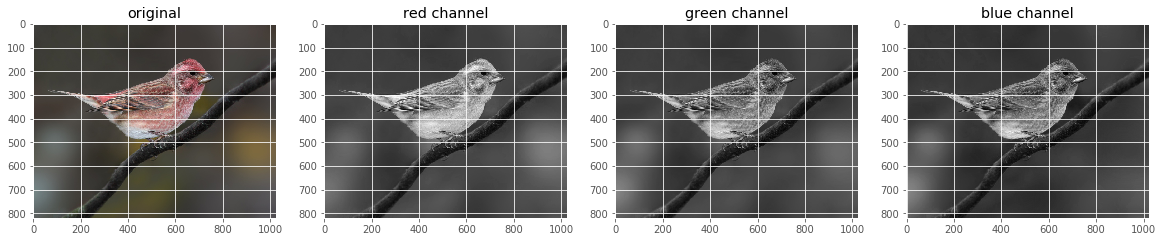

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(20,10))

axes[0].imshow(img)
axes[0].set_title('original')
for ax, channel, name in zip(axes[1:], img.split(), ['red channel', 'green channel', 'blue channel']):
    ax.imshow(channel, cmap='gray')
    ax.set_title(name)

In [25]:
# animals = []
# with open('wcs_camera_traps.json') as f:
#     for i, k in enumerate(f):
#         if (i < 100):
#             print(k)
# #             try:
#                 animals.append(json.load(k))
#             except:
#                 continue